# The no-show appointments data analysis

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will analyse the no-show medical appointments dataset from Brazil. 

We will formulate some questions along the way, such as which features are more related to a no-show of a pacient, and exolore the relations between the features. These questions will be proposed and explored later in the exploratory part of the project. 

Finally, we will answer our questions in the conclusion topic, sharing our findings with the help of Data Analysis.

We will import the four packages below, to help us make and explore our analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

As a requirement for the project, the function used can be shown below:

In [2]:
def five_rows(dataframe):
    return dataframe.head()    # the function is used to show the first 5 rows of the dataframe

<a id='wrangling'></a>
## Data Wrangling

With the packages imported to our notebook, we can load our dataset, and get a quick view of it:

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')    # store the csv file in a dataframe
five_rows(df)    # show the function is working, and could be used throughout the project

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We can see if we have any duplicated value:

In [4]:
df.duplicated().sum()    # show the total duplicated values

0

We can see the columns of the dataframe and its index: 

In [5]:
for i, v in enumerate (df.columns):
    print(i, v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


As we can see, our dataset has 13 features, but some of them will not be used, so we will drop the following columns:

* PatientId
* AppointmentID

In [6]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)    # drop the columns
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We will change the name of the columns, so they are standardized:

In [7]:
df.rename(columns=lambda x: x.strip().lower().replace('-', '_'), inplace=True)    # set the columns names for lower case and replace - for _
df.rename(columns={'scheduledday': 'scheduled_day', 'appointmentday': 'appointment_day'}, inplace=True)    # change the columns names
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We can see the dimensions of our dataset now:

In [8]:
df.shape    # show the number of rows and columns

(110527, 12)

We can see the datatype of our data:

In [9]:
df.dtypes    # see the datatype of each column

gender             object
scheduled_day      object
appointment_day    object
age                 int64
neighbourhood      object
scholarship         int64
hipertension        int64
diabetes            int64
alcoholism          int64
handcap             int64
sms_received        int64
no_show            object
dtype: object

We will change scheduled_day and appointment_day datatype to datetime, which will help in our analysis:

In [10]:
df['scheduled_day'] = df['scheduled_day'].astype('datetime64[ns]').dt.date.astype('datetime64[ns]')  # change the datatype to datetime and remove the time as well
df['appointment_day'] = df['appointment_day'].astype('datetime64[ns]')    # change the datatype to datetime

In [11]:
df.dtypes

gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hipertension                int64
diabetes                    int64
alcoholism                  int64
handcap                     int64
sms_received                int64
no_show                    object
dtype: object

In [12]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now we will see if there are rows with missing values, and as there is none, our analysis will be more precise:

In [13]:
df.isnull().sum()    # see the number of missing columns of each column

gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hipertension       0
diabetes           0
alcoholism         0
handcap            0
sms_received       0
no_show            0
dtype: int64

We will create another column, with the diference in days between the appointment and the scheduled days:

In [14]:
df['difference_days'] = (df['appointment_day'] - df['scheduled_day']).dt.days    # create another column
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,difference_days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


As the difference between the appointment and the scheduled days is what matter to us, not the days themselves, we can drop both of these columns:

In [15]:
df.drop(['scheduled_day', 'appointment_day'], axis=1, inplace=True)    # drop the columns 
df = df.iloc[:, [2, 0, 1, 3, 4, 5, 6, 7, 8, 10, 9]]   # change the order of the columns
df.head()

,neighbourhood,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,difference_days,no_show
0,JARDIM DA PENHA,F,62,0,1,0,0,0,0,0,No
1,JARDIM DA PENHA,M,56,0,0,0,0,0,0,0,No
2,MATA DA PRAIA,F,62,0,0,0,0,0,0,0,No
3,PONTAL DE CAMBURI,F,8,0,0,0,0,0,0,0,No
4,JARDIM DA PENHA,F,56,0,1,1,0,0,0,0,No


Now, we will change the no_show column values, with No standing to 0 and Yes standing for 1: 

In [16]:
df['no_show'].replace(('Yes', 'No'), (1, 0), inplace=True)    # replace the values
df['no_show'] = df['no_show'].astype(int)   # change the datatype from string to int
df.head()

,neighbourhood,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,difference_days,no_show
0,JARDIM DA PENHA,F,62,0,1,0,0,0,0,0,0
1,JARDIM DA PENHA,M,56,0,0,0,0,0,0,0,0
2,MATA DA PRAIA,F,62,0,0,0,0,0,0,0,0
3,PONTAL DE CAMBURI,F,8,0,0,0,0,0,0,0,0
4,JARDIM DA PENHA,F,56,0,1,1,0,0,0,0,0


Finally we, will create two masks, to separate those who showed up and those who didn't show up:

<a id='eda'></a>
## Exploratory Data Analysis

With our data cleaned, we are ready to answer our questions.

### What features that are related to a no-show appointment: neighbourhood, gender, age, SMS received or difference in days?

 * #### For neighbourhood:
 

<AxesSubplot:xlabel='gender', ylabel='count'>

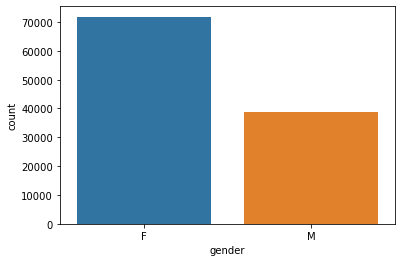

In [41]:
sns.countplot(data=df, x = 'gender')

Text(0, 0.5, 'Neighbourhood')

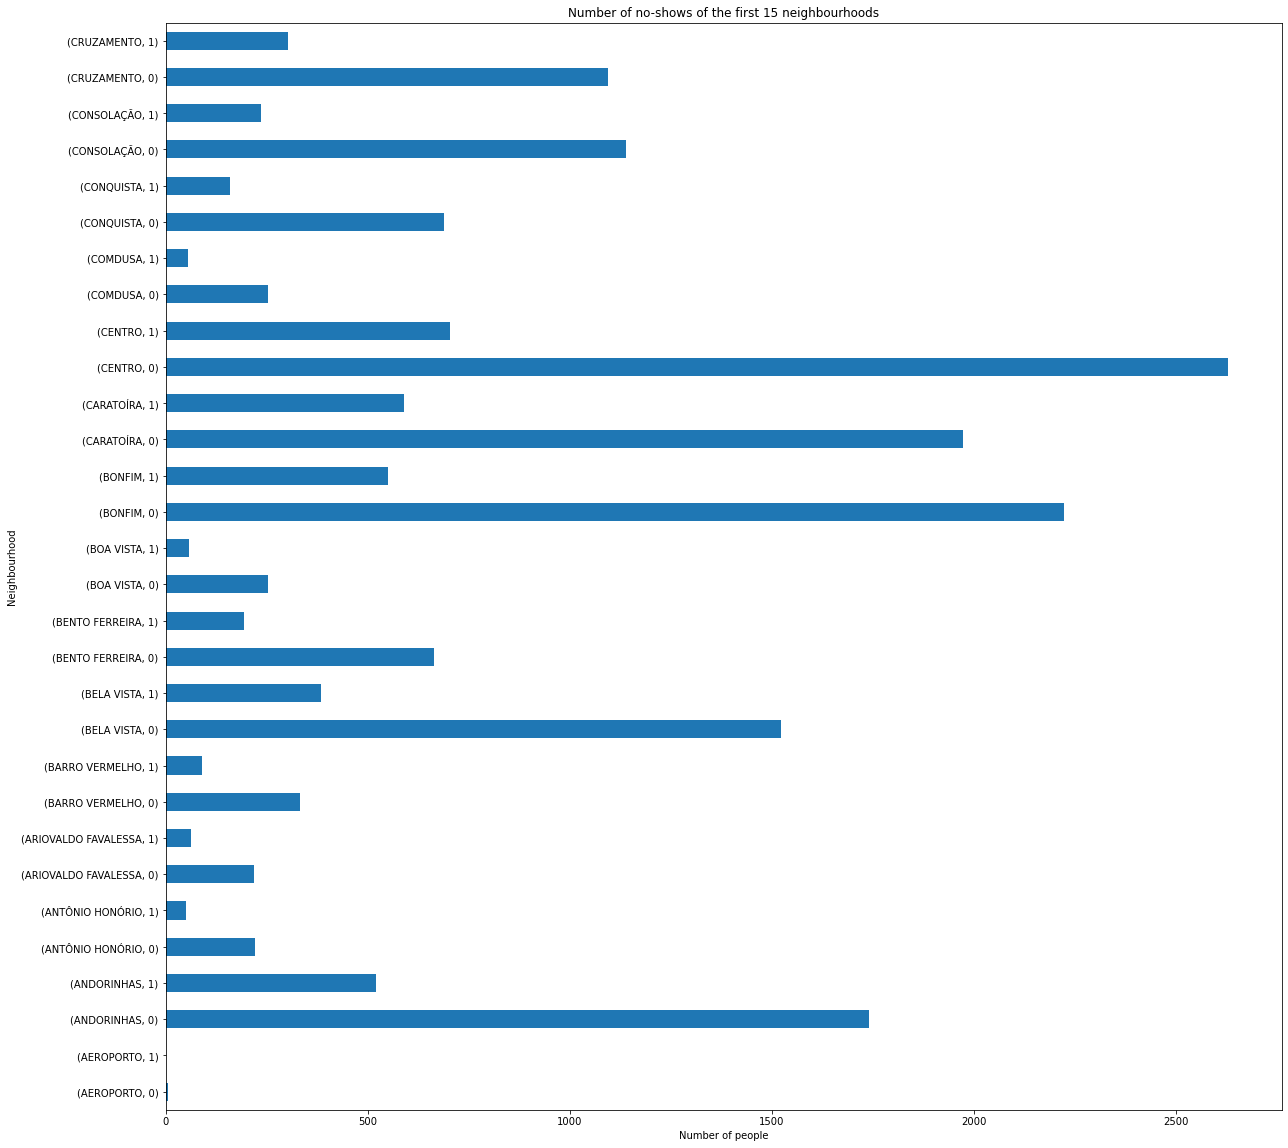

In [17]:
df.groupby(['neighbourhood', 'no_show']).count()['gender'].head(30).plot(kind='barh', figsize=(20,20))

plt.title('Number of no-shows of the first 15 neighbourhoods')    # set title 
plt.xlabel('Number of people')    # set x-axis
plt.ylabel('Neighbourhood')    # set the y-axis; 

We can see that the neighbourhood location influences whether there is a no-show or not. For instance, Cruzamento has a slight smaller number of people showing to the apppointment than Consoloação. However, the number of no-shos from Cruzamento is higher
 than Consoloação, which is a clue to our statement, as well for other locations.

* #### For gender:

In [ ]:
df.groupby

In [18]:
df.groupby(['gender', 'no_show']).count()['age']

gender  no_show
F       0          57246
        1          14594
M       0          30962
        1           7725
Name: age, dtype: int64

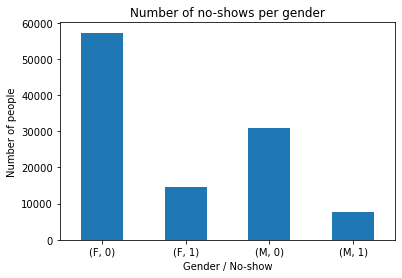

In [19]:
df.groupby(['gender', 'no_show']).count()['age'].plot(kind='bar', rot=0)

plt.title('Number of no-shows per gender')
plt.xlabel('Gender / No-show')
plt.ylabel('Number of people');

We can see that gender does not seem to influence on the no-shows, as the proportion for each gender is pretty close.

* #### For age:

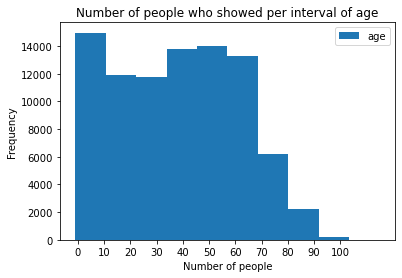

In [20]:
count, bin_edges = np.histogram(df['age'], bins=[0,10,20,30,40,50,60,70,80,90,100])

df.query('no_show == 0')['age'].to_frame().plot(kind='hist', xticks=bin_edges)

plt.title('Number of people who showed per interval of age')
plt.xlabel('Number of people');

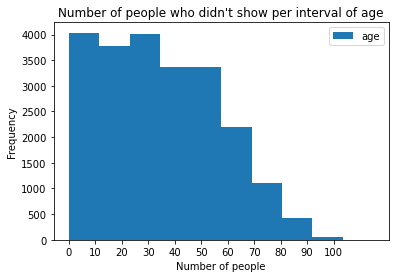

In [21]:
count, bin_edges = np.histogram(df['age'], bins=[0,10,20,30,40,50,60,70,80,90,100])

df.query('no_show == 1')['age'].to_frame().plot(kind='hist', xticks=bin_edges)

plt.title("Number of people who didn't show per interval of age")
plt.xlabel('Number of people');

Age doesn't look to have much influence on no-show.

* #### For sms received:

In [22]:
df.groupby(['sms_received', 'no_show']).count()['age']

sms_received  no_show
0             0          62510
              1          12535
1             0          25698
              1           9784
Name: age, dtype: int64

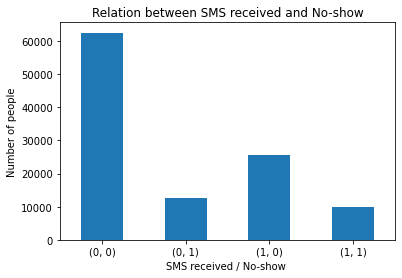

In [23]:
df.groupby(['sms_received', 'no_show']).count()['age'].plot(kind='bar', rot=0)

plt.title('Relation between SMS received and No-show')
plt.xlabel('SMS received / No-show ')
plt.ylabel('Number of people');

It seems that receiving a SMS, makes the patient more likely to show for the appointment, than if he doesn't receive one.

* #### For diference in days:

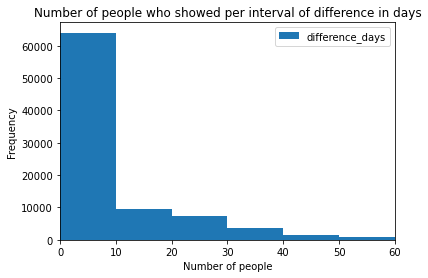

In [24]:
df.query('no_show == 0')['difference_days'].to_frame().plot(kind='hist', bins=[0,10,20,30,40,50,60])

plt.title('Number of people who showed per interval of difference in days')
plt.xlabel('Number of people')
plt.xlim(0,60);

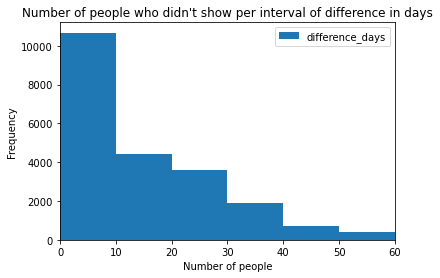

In [25]:
df.query('no_show == 1')['difference_days'].to_frame().plot(kind='hist', bins=[0,10,20,30,40,50,60])

plt.title("Number of people who didn't show per interval of difference in days")
plt.xlabel('Number of people')
plt.xlim(0,60);

We can see that, the higher the difference in days of the scheduled and the appointment, higher the chances are of a no-show

### Is there any relation between the age and the difference in days?

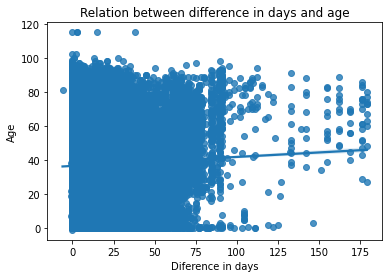

In [26]:
sns.regplot(x='difference_days', y='age', data=df)

plt.title('Relation between difference in days and age')
plt.xlabel('Diference in days')
plt.ylabel('Age');

With the scatter plot above, as well as with the adjusted regression line, the two features don't have much influence at each other.

### What disease is more connected with alcoholism: hipertension or diabetes?

* #### For hipertension:

In [27]:
df.groupby(['alcoholism', 'hipertension']).count()['age']

alcoholism  hipertension
0           0               86693
            1               20474
1           0                2033
            1                1327
Name: age, dtype: int64

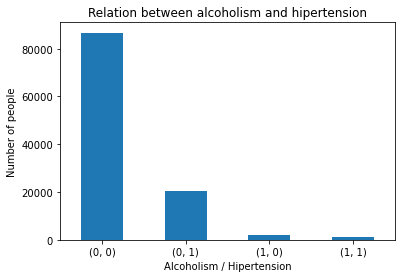

In [28]:
df.groupby(['alcoholism', 'hipertension']).count()['age'].plot(kind='bar', rot=0)

plt.title('Relation between alcoholism and hipertension')
plt.xlabel('Alcoholism / Hipertension')
plt.ylabel('Number of people');

* #### For diabetes:

In [29]:
df.groupby(['alcoholism', 'diabetes']).count()['age']

alcoholism  diabetes
0           0           99556
            1            7611
1           0            3028
            1             332
Name: age, dtype: int64

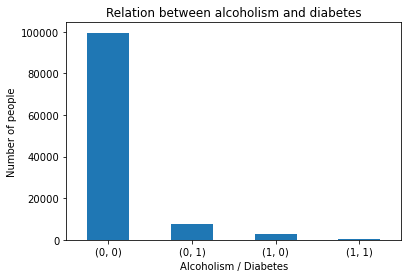

In [30]:
df.groupby(['alcoholism', 'diabetes']).count()['age'].plot(kind='bar', rot=0)

plt.title('Relation between alcoholism and diabetes')
plt.xlabel('Alcoholism / Diabetes')
plt.ylabel('Number of people');

Observing the 2 plots, we can infer that hipertension is slightly more related to alcoholism than diabetes.

### Are people with scholarship more tendent to have hipertension,	diabetes and alcoholism ?

* #### For hipertension:

In [31]:
df.groupby(['scholarship', 'hipertension']).count()['age']

scholarship  hipertension
0            0               79749
             1               19917
1            0                8977
             1                1884
Name: age, dtype: int64

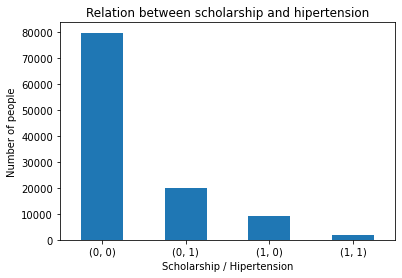

In [32]:
df.groupby(['scholarship', 'hipertension']).count()['age'].plot(kind='bar', rot=0)

plt.title('Relation between scholarship and hipertension')
plt.xlabel('Scholarship / Hipertension')
plt.ylabel('Number of people');

* #### For diabetes:

In [33]:
df.groupby(['scholarship', 'diabetes']).count()['age']

scholarship  diabetes
0            0           92292
             1            7374
1            0           10292
             1             569
Name: age, dtype: int64

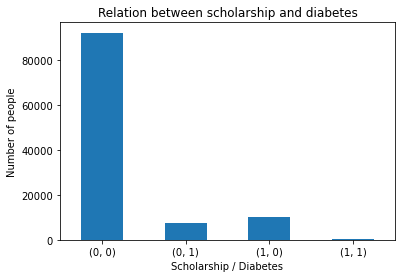

In [34]:
df.groupby(['scholarship', 'diabetes']).count()['age'].plot(kind='bar', rot=0)

plt.title('Relation between scholarship and diabetes')
plt.xlabel('Scholarship / Diabetes')
plt.ylabel('Number of people');

* #### For alcoholism:

In [35]:
df.groupby(['scholarship', 'alcoholism']).count()['age']

scholarship  alcoholism
0            0             96834
             1              2832
1            0             10333
             1               528
Name: age, dtype: int64

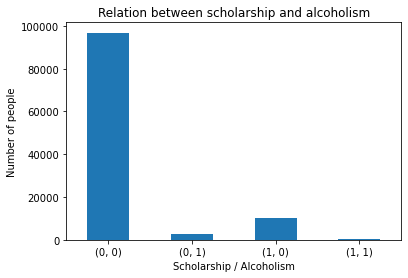

In [36]:
df.groupby(['scholarship', 'alcoholism']).count()['age'].plot(kind='bar', rot=0)

plt.title('Relation between scholarship and alcoholism')
plt.xlabel('Scholarship / Alcoholism')
plt.ylabel('Number of people');

With the 3 plots above, they are no clue to us, that shows scholarship influences eighter on hipertension, diabetes or alcoholism.

<a id='conclusions'></a>
## Conclusions

### What features that are related to a no-show appointment: neighbourhood, gender, age, SMS received or difference in days?

* The two features that look more related to the no-show are neighbourhood location and if the person received an SMS; 
* Overall, age and gender don't look very decisive if a person will no-show or not;
* The difference in days between the appointment and the scheduled day is also related. The closer the appointment and the schedule, higher the chances are of the patient showing up.

### Is there any relation between the age and the difference in days?

* There doesn't seem to be a relation between these two features.

### What disease is more connected with alcoholism: hipertension or diabetes?

* Hipertension is the disease that looks more connected with alcoholism.

### Are people with scholarship more tendent to have hipertension,	diabetes and alcoholism ?

* Any relation was clear enough to state any tendency.

#### Final considerations

To end this project, it was very interesting to work with this dataset. It was very easy to handle, as it didn't have any missing value nor duplicated value, so the data wrangling step was just about letting the data in a more viewable way, to better understand it.
For the limitations, the only one I found was when plotting the number of shows and no-shows for each neighbourhood. As the total amount of neighbourhoods were 80, plotting would have 160 bars, which would pollute the plot. So the solution I found was plotting for the first 15 neighbourhoods, and as it was enough to see the relation between the variables, I think it was enough to achieve the conclusion.
Furthermore, I didn't have any trouble working with the data, and the code ran as intended.